In [2]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
import skmob
from skmob.measures.individual import real_entropy, uncorrelated_entropy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("mandagsmagi.csv")
data_entr = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/Thesis/Data/Data_med_entropy.csv",
    index_col=0,
)

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_26745/2924445775.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data_entr = pd.read_csv(


In [21]:
data_entr.head(5)

,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,...,impressions_lo,impressions_hi,party,state,labels,scores,top_label,top_score,uncorrelated_entropy,real_entropy
ad_creation_time,,,,,,,,,,,,,,,,,,,,,
2020-02-12,Every kid in America should have the same acce...,49.5,499.5,"[{'percentage': '0.001175', 'region': 'Alabama...","[{'percentage': '0.003529', 'age': '25-34', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",488348208497291,0,...,0,999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612
2020-02-12,Every kid in America should have the same acce...,49.5,499.5,"[{'percentage': '0.026738', 'region': 'Colorad...","[{'percentage': '0.002674', 'age': '25-34', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",494013894629856,0,...,0,999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612
2020-02-12,Every kid in America should have the same acce...,49.5,1499.5,"[{'percentage': '0.010661', 'region': 'Alabama...","[{'percentage': '0.001067', 'age': '35-44', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",469970110548642,0,...,1000,1999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612
2020-02-12,Every kid in America should have the same acce...,49.5,499.5,"[{'percentage': '0.004944', 'region': 'Alabama...","[{'percentage': '0.003708', 'age': '35-44', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",271731930474720,0,...,0,999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612
2020-02-12,Every kid in America should have the same acce...,49.5,499.5,"[{'percentage': '0.034682', 'region': 'Arizona...","[{'percentage': '0.138728', 'age': '35-44', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",595816060977581,0,...,0,999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612


In [3]:
data = data.drop_duplicates(subset=["page_id"])

In [33]:
data_entr = data_entr.drop_duplicates(subset=["page_id"])
datak = data_entr.sort_values(by=["page_id", "ad_creation_time"])

## testing uncor



In [24]:
data1 = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/entrop/th_mindre_batch_done.csv",
    names=["uid", "real2"],
    header=None,
)

In [19]:
data_un = pd.merge(data, data1, left_on="page_id", right_on="uid", how="left")
data_un = data_un.drop_duplicates(subset=["page_id"])  # narrowing down to 518 politicians
# mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)
# data_un = pd.merge(data_un, re_df, left_on="page_id", right_on="uid", how="left")
# data_un = data_un.drop("uid", axis=1)

In [23]:
data_un.tail(5)

,Unnamed: 0,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,...,spend_hi,impressions_lo,impressions_hi,party,state,labels,scores,top_label,top_score,real2
447458,447458,2021-07-22,America is drowning in liberal policies. Repub...,49.5,499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.009346', 'age': '18-24', 'g...",9157920604,Ken Calvert,KEN CALVERT FOR CONGRESS COMMITTEE,...,99,0,999,Republican,CA,"['Call for Action', 'Defense', 'Other', 'Immig...","[0.9981767535209656, 0.00039640290196985006, 0...",Call for Action,0.998177,0.827208
447742,447742,2021-10-31,LIVE POLL: BIDEN-HARRIS APPROVAL \n\nWe want t...,149.5,7499.5,"[{'percentage': '0.024631', 'region': 'Alabama...","[{'percentage': '0.001936', 'age': '55-64', 'g...",1636216106590985,Josh Hawley,NRSC,...,199,7000,7999,Republican,MO,"['Call for Action', 'Foreign Affair', 'Other',...","[0.993141770362854, 0.00353661528788507, 0.000...",Call for Action,0.993142,0.030421
449826,449826,2018-10-30,"We’ve got 7 days left. No regrets, only doors....",49.5,1499.5,"[{'percentage': '1', 'region': 'Illinois'}]","[{'percentage': '0.006006', 'age': '18-24', 'g...",15338600709,Janice Schakowsky,Jan Schakowsky for Congress,...,99,1000,1999,Democrat,IL,"['Labor and Employment', 'Call for Action', 'L...","[0.5645846724510193, 0.42280319333076477, 0.00...",Labor and Employment,0.564585,1.056126
459594,459594,2020-10-26,Michelle Littleton tells her story,1249.5,47499.5,"[{'percentage': '1', 'region': 'Florida'}]","[{'percentage': '0.000142', 'age': '18-24', 'g...",280117065340803,Bill Posey for Congress,FRIENDS OF BILL POSEY,...,1499,45000,49999,Republican,FL,"['Education and Culture', 'Labor and Employmen...","[0.18133902549743652, 0.09818907827138901, 0.0...",Education and Culture,0.181339,1.380890
459727,459727,2021-10-08,I am committed to helping middle-class familie...,449.5,12499.5,"[{'percentage': '1', 'region': 'California'}]","[{'percentage': '0.001772', 'age': '65+', 'gen...",182567716746,Congressman John Garamendi,Office of Congressman John Garamendi,...,499,10000,14999,Democrat,CA,"['Economy', 'Call for Action', 'Other', 'Labor...","[0.97571861743927, 0.01566304825246334, 0.0026...",Economy,0.975719,0.000000


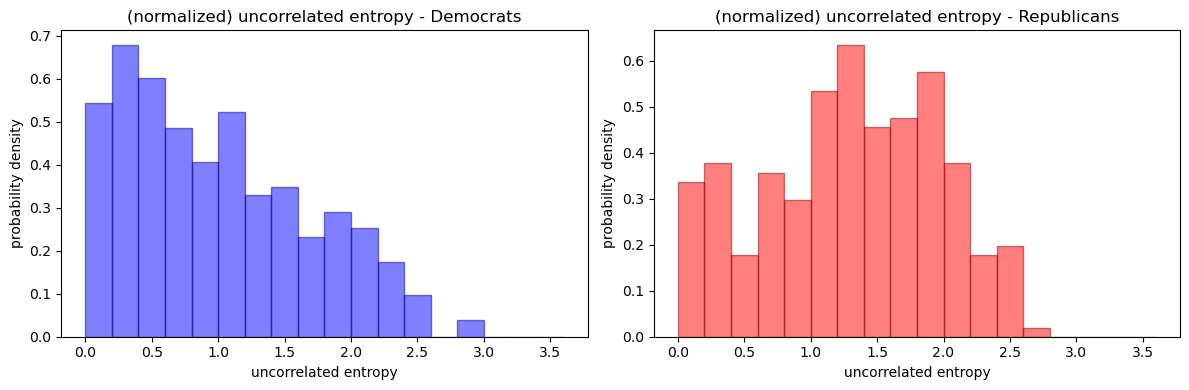

In [27]:
df1 = data_un[data_un["party"] == "Democrat"]
df2 = data_un[data_un["party"] == "Republican"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(
    df1["real2"],
    bins=np.linspace(0, 3.6, 19),
    alpha=0.5,
    color="blue",
    edgecolor="darkblue",
    density=True,
)
axes[0].set_title("(normalized) real entropy - Democrats")
axes[0].set_ylabel("probability density")
axes[0].set_xlabel("uncorrelated entropy")

axes[1].hist(
    df2["real2"],
    bins=np.linspace(0, 3.6, 19),
    alpha=0.5,
    color="red",
    edgecolor="darkred",
    # fill=False,
    density=True,
)
axes[1].set_title("(normalized) real entropy - Republicans")
axes[1].set_ylabel("probability density")
axes[1].set_xlabel("uncorrelated entropy")

plt.tight_layout()
plt.show()

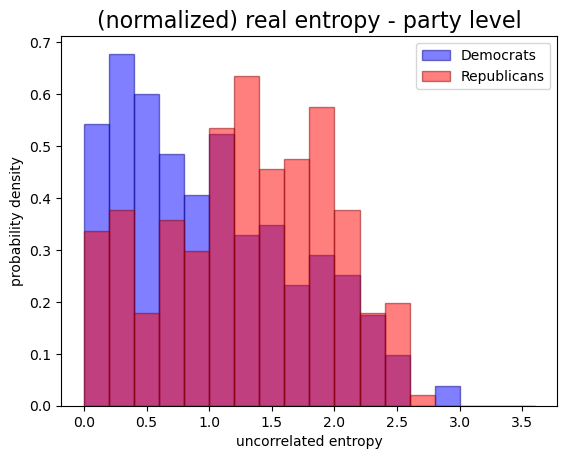

In [28]:
plt.hist(
    df1["real2"],
    bins=np.linspace(0, 3.6, 19),
    label="Democrats",
    alpha=0.5,
    color="blue",
    edgecolor="darkblue",
    density=True,
)

plt.hist(
    df2["real2"],
    bins=np.linspace(0, 3.6, 19),
    label="Republicans",
    alpha=0.5,
    color="red",
    edgecolor="darkred",
    density=True,
)

plt.title("(normalized) real entropy - party level", fontsize=16)
plt.legend()
plt.ylabel("probability density")
plt.xlabel("uncorrelated entropy")
plt.show()

## sammenligner entropy

In [13]:
#data = pd.read_csv("mandagsmagi.csv")

data = data[["page_id", "page_name", "top_label", "ad_creation_time"]]
data["top_label_int"] = pd.factorize(data["top_label"], sort=True)[0] + 1
data["lat"] = 0.0

# Convert data into a TrajDataFrame
tdf = skmob.TrajDataFrame(
    data,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)


# Compute entropy for this batch
ue_df = real_entropy(tdf)

# re_df_batch = real_entropy(batch_tdf)

  2%|▏         | 8/518 [00:08<09:09,  1.08s/it]


KeyboardInterrupt: 

In [9]:
# Print or save the batch results
print("Batch Processing Results for First 2 Users:")
print(ue_df)

Batch Processing Results for First 2 Users:
                uid  uncorrelated_entropy
0        8408030527              1.446338
1       13063797831              0.713197
2       38471053686              1.588226
3       79820371749              0.573872
4   124955570892789              0.938130
5   134597023235240              1.006580
6   184609361596971              1.674923
7   248922701788783              2.462502
8   828902563856302              1.166299
9  1413682351987764              1.527401


In [10]:
# Calculate real_entropy for the entire DataFrame and then filter the results
re_df_single = uncorrelated_entropy(tdf)

# Filter to the first 5 users in the single computation result
re_df_first_5_single = re_df_single[re_df_single["uid"].isin(first_5_users)]

# Print or save the single computation results
print("Single Computation Results for First 2 Users:")
print(re_df_first_5_single)

100%|██████████| 518/518 [00:02<00:00, 174.63it/s]

Single Computation Results for First 2 Users:
                  uid  uncorrelated_entropy
45         8408030527              1.446338
56        13063797831              0.713197
75        38471053686              1.588226
95        79820371749              0.573872
200   124955570892789              0.938130
208   134597023235240              1.006580
254   184609361596971              1.674923
290   248922701788783              2.462502
426   828902563856302              1.166299
462  1413682351987764              1.527401


In [33]:
data = pd.read_csv("mandagsmagi.csv")

In [34]:
data = data[["page_id", "page_name", "top_label", "ad_creation_time"]]

# Convert categorical data and add constant latitude
data["top_label_int"] = pd.factorize(data["top_label"], sort=True)[0] + 1
data["lat"] = 0.0

# Convert data into a TrajDataFrame
tdf = skmob.TrajDataFrame(
    data,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)

In [35]:
ue_df = uncorrelated_entropy(tdf, normalize=False)

100%|██████████| 518/518 [00:03<00:00, 161.58it/s]


In [36]:
re_df = real_entropy(tdf)


  2%|▏         | 8/518 [00:24<26:00,  3.06s/it]


KeyboardInterrupt: 

## filtering

In [52]:
threshold_2 = data[data["top_score"] >= 0.2]  # from 459.728 to 457.609  # 517 politicians (1 is filtered away)
threshold_4 = data[data["top_score"] >= 0.4]  # from 459.728 to 442.854  # 516 politicians (2 is filtered away)

## ny filtering

In [4]:
id_B = [124955570892789, 1316372698453411]
filtered_data = data[~data["page_id"].isin(id_B)]

In [5]:
filtered_data_a = data[data["page_id"].isin([1316372698453411])]
midpoint = len(filtered_data_a) // 2

# Split the DataFrame into two parts
df_part1 = filtered_data_a.iloc[:midpoint]
df_part2 = filtered_data_a.iloc[midpoint:]

df_part1["page_id"] = df_part1["page_id"].replace(1316372698453411, 130000000000000)
df_part2["page_id"] = df_part2["page_id"].replace(1316372698453411, 130000000000001)

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_1129/1061959410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part1["page_id"] = df_part1["page_id"].replace(1316372698453411, 130000000000000)
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_1129/1061959410.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2["page_id"] = df_part2["page_id"].replace(1316372698453411, 130000000000001)


In [13]:
filtered_data_b = threshold_4[threshold_4["page_id"].isin([124955570892789])]
midpoint = len(filtered_data_b) // 2

# Split the DataFrame into two parts
df_part1_b = filtered_data_b.iloc[:midpoint]
df_part2_b = filtered_data_b.iloc[midpoint:]

df_part1_b["page_id"] = df_part1_b["page_id"].replace(124955570892789, 120000000000000)
df_part2_b["page_id"] = df_part2_b["page_id"].replace(124955570892789, 120000000000001)

/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_14238/1023623031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part1_b["page_id"] = df_part1_b["page_id"].replace(124955570892789, 120000000000000)
/var/folders/cr/2b4bjd0d6cscnr8h_66vmrqm0000gn/T/ipykernel_14238/1023623031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2_b["page_id"] = df_part2_b["page_id"].replace(124955570892789, 120000000000001)


In [14]:
combined_df = pd.concat(
    [filtered_data, df_part1, df_part2, df_part2_b, df_part1_b], ignore_index=True
)

In [7]:
df_part2.to_csv("alex2_krampe.csv")

In [20]:
combined_df.nunique()

Unnamed: 0                  442854
ad_creation_time              1233
ad_creative_body             53846
spend                           42
impressions                     39
delivery_by_region          327047
demographic_distribution    442364
page_id                        518
page_name                      551
bylines                        948
id                          442854
spend_lo                        42
spend_hi                        42
impressions_lo                  39
impressions_hi                  39
party                            2
state                           54
labels                       51888
scores                       53592
top_label                       16
top_score                    51686
dtype: int64

## running through threshold >= 2

In [53]:
threshold_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457609 entries, 0 to 459727
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              457609 non-null  int64  
 1   Unnamed: 0                457609 non-null  int64  
 2   ad_creation_time          457609 non-null  object 
 3   ad_creative_body          457609 non-null  object 
 4   spend                     457609 non-null  float64
 5   impressions               457609 non-null  float64
 6   delivery_by_region        457609 non-null  object 
 7   demographic_distribution  457609 non-null  object 
 8   page_id                   457609 non-null  int64  
 9   page_name                 457609 non-null  object 
 10  bylines                   456391 non-null  object 
 11  id                        457609 non-null  int64  
 12  spend_lo                  457609 non-null  int64  
 13  spend_hi                  457609 non-null  int64 

In [54]:
threshold_2 = threshold_2[threshold_2["page_id"] == 6358769182]

In [55]:
threshold_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              0 non-null      int64  
 1   Unnamed: 0                0 non-null      int64  
 2   ad_creation_time          0 non-null      object 
 3   ad_creative_body          0 non-null      object 
 4   spend                     0 non-null      float64
 5   impressions               0 non-null      float64
 6   delivery_by_region        0 non-null      object 
 7   demographic_distribution  0 non-null      object 
 8   page_id                   0 non-null      int64  
 9   page_name                 0 non-null      object 
 10  bylines                   0 non-null      object 
 11  id                        0 non-null      int64  
 12  spend_lo                  0 non-null      int64  
 13  spend_hi                  0 non-null      int64  
 14  impressions_lo            0

In [31]:
# b = pd.read_csv("/Users/sofiepalmuskronborg/Desktop/minus_ba.csv", index_col=0)
threshold_2 = threshold_2[["page_id", "top_label", "ad_creation_time"]]

threshold_2["top_label_int"] = (
    pd.factorize(threshold_2["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

threshold_2["lat"] = 0.0

tdf_2 = skmob.TrajDataFrame(
    threshold_2,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)


In [32]:
# uncorrelated + real entropy
ue_df_2 = uncorrelated_entropy(tdf_2, normalize=False)
#re_df_2 = real_entropy(tdf_2)

100%|██████████| 517/517 [00:05<00:00, 92.58it/s] 


In [33]:
data_un = data_entr.drop_duplicates(
    subset=["page_id"]
)  # narrowing down to 518 politicians
data_un = pd.merge(
    data_un, ue_df_2, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)
data_un.rename(
    columns={
        "uncorrelated_entropy_x": "uncor_entropy",
        "uncorrelated_entropy_y": "uncor_entropy >= 0.2",
    },
    inplace=True,
)

In [21]:
data_un.head(5)

,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id,spend_lo,...,impressions_hi,party,state,labels,scores,top_label,top_score,uncorrelated_entropy,real_entropy,uncorrelated_entropy >= 0.2
0,Every kid in America should have the same acce...,49.5,499.5,"[{'percentage': '0.001175', 'region': 'Alabama...","[{'percentage': '0.003529', 'age': '25-34', 'g...",38471053686,Elizabeth Warren,"WARREN FOR PRESIDENT, INC.",488348208497291,0,...,999,Democrat,MA,"['Education and Culture', 'Call for Action', '...","[0.521308422088623, 0.4189971387386322, 0.0142...",Education and Culture,0.521308422088623,1.595782,0.382612,1.586605
1,Scott Pruitt is a climate change denier and he...,49.5,2499.5,"[{'percentage': '1', 'region': 'Michigan'}]","[{'percentage': '0.019285', 'age': '18-24', 'g...",8408030527,Debbie Stabenow,Stabenow for U.S. Senate,2081170495464207,0,...,2999,Democrat,MI,"['Call for Action', 'Climate', 'Other', 'Defen...","[0.9937354326248169, 0.003931672777980566, 0.0...",Call for Action,0.9937354326248169,1.446338,0.879410,1.446338
2,I’m humbly asking you: can you donate to suppo...,49.5,499.5,"[{'percentage': '0.006186', 'region': 'Alaska'...","[{'percentage': '0.002062', 'age': '25-34', 'g...",828902563856302,Chuck Schumer D-NY,FRIENDS OF SCHUMER,297075041792749,0,...,999,Democrat,NY,"['Call for Action', 'Other', 'Climate', 'Defen...","[0.9946742653846741, 0.001705612288787961, 0.0...",Call for Action,0.9946742653846741,1.166299,0.644102,1.151984
3,"Ayanna’s bold, progressive leadership has neve...",49.5,499.5,"[{'percentage': '0.018519', 'region': 'Alaska'...","[{'percentage': '0.009259', 'age': '35-44', 'g...",79820371749,Ayanna Pressley,THE COMMITTEE TO ELECT AYANNA PRESSLEY,411627883927859,0,...,999,Democrat,MA,"['Call for Action', 'Defense', 'Labor and Empl...","[0.5172978043556213, 0.47809359431266785, 0.00...",Call for Action,0.5172978043556213,0.573872,0.121228,0.572437
4,"When you contribute to our campaign, you’re no...",49.5,2499.5,"[{'percentage': '0.00066', 'region': 'Mississi...","[{'percentage': '0.000657', 'age': '18-24', 'g...",134597023235240,Rashida Tlaib,RASHIDA TLAIB FOR CONGRESS,136549268563064,0,...,2999,Democrat,MI,"['Call for Action', 'Climate', 'Other', 'Civil...","[0.9879468679428101, 0.006698802579194307, 0.0...",Call for Action,0.9879468679428101,1.006580,0.595553,0.988705


## running through threshold >= 4

In [34]:
# b = pd.read_csv("/Users/sofiepalmuskronborg/Desktop/minus_ba.csv", index_col=0)
threshold_4 = threshold_4[["page_id", "top_label", "ad_creation_time"]]

threshold_4["top_label_int"] = (
    pd.factorize(threshold_4["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

threshold_4["lat"] = 0.0

tdf_4 = skmob.TrajDataFrame(
    threshold_4,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)

In [35]:
# uncorrelated + real entropy
ue_df_4 = uncorrelated_entropy(tdf_4, normalize=False)
# re_df_2 = real_entropy(tdf_2)

100%|██████████| 516/516 [00:06<00:00, 79.19it/s] 


In [36]:
data_un = pd.merge(
    data_un, ue_df_4, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)
data_un.rename(
    columns={
        "uncorrelated_entropy": "uncor_entropy >= 0.4",
    },
    inplace=True,
)

In [38]:
data_un.to_csv("data_threshold_entropy.csv")

In [4]:
data_done = pd.read_csv("minus_cfa_plus_entropy.csv", index_col=0)

## filtering away Call for Action

In [4]:
data_filt = data[
    data["top_label"] != "Call for Action"
]  # from 459.728 to 106.240  # 498 politicians (20 are filtered away)

In [65]:
data_filt = data_filt[["page_id", "page_name", "party", "top_label", "ad_creation_time"]]

data_filt["top_label_int"] = (
    pd.factorize(data_filt["top_label"], sort=True)[0] + 1
)  # convert Categories to float starting from 1.0 alphabetically

data_filt["lat"] = 0.0

tdf = skmob.TrajDataFrame(
    data_filt,
    latitude="lat",
    longitude="top_label_int",
    datetime="ad_creation_time",
    user_id="page_id",
)
ue_df_2 = uncorrelated_entropy(tdf, normalize=False)

100%|██████████| 498/498 [00:06<00:00, 79.04it/s] 


In [63]:
data = pd.read_csv(
    "/Users/sofiepalmuskronborg/Desktop/minus_cfa_batch_done.csv",
    names=["uid", "minus_cfa real entropy"],
    header=None,
)

In [62]:
data_filt = pd.read_csv(
    "/Users/sofiepalmuskronborg/Library/CloudStorage/OneDrive-ITU/ITU/minus_cfa.csv",index_col=0,
)

In [66]:
data_filt = data_filt.drop_duplicates(subset=["page_id"])

In [67]:
data_un = pd.merge(
    data_filt, ue_df_2, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_un = data_un.drop("uid", axis=1)

In [68]:
data.head(5)

,uid,minus_cfa real entropy
0,2222844871168340,2.190005
1,2225580284361712,1.865068
2,2382869555319923,1.445414
3,2429204567121956,0.666667
4,2452029394813890,2.415119


In [69]:
data_done = pd.merge(
    data_un, data, left_on="page_id", right_on="uid", how="left"
)  # mapping uncorrealted values back to dataframe with 518 politicians
data_done = data_done.drop("uid", axis=1)

In [70]:
data_done.head(5)

,page_id,page_name,party,top_label,ad_creation_time,top_label_int,lat,uncorrelated_entropy,minus_cfa real entropy
0,38471053686,Elizabeth Warren,Democrat,Education and Culture,2020-02-12,6,0.0,3.363164,0.742229
1,828902563856302,Chuck Schumer D-NY,Democrat,Climate,2021-09-21,3,0.0,2.580020,1.314866
2,79820371749,Ayanna Pressley,Democrat,Law and Crime,2019-04-20,12,0.0,2.257328,0.968652
3,124955570892789,Bernie Sanders,Democrat,Economy,2021-10-01,5,0.0,2.695249,0.095552
4,13063797831,Ben Ray Luján,Democrat,Climate,2019-04-30,3,0.0,1.087841,0.366178


In [94]:
data_done = pd.read_csv("minus_cfa_plus_entropy.csv")

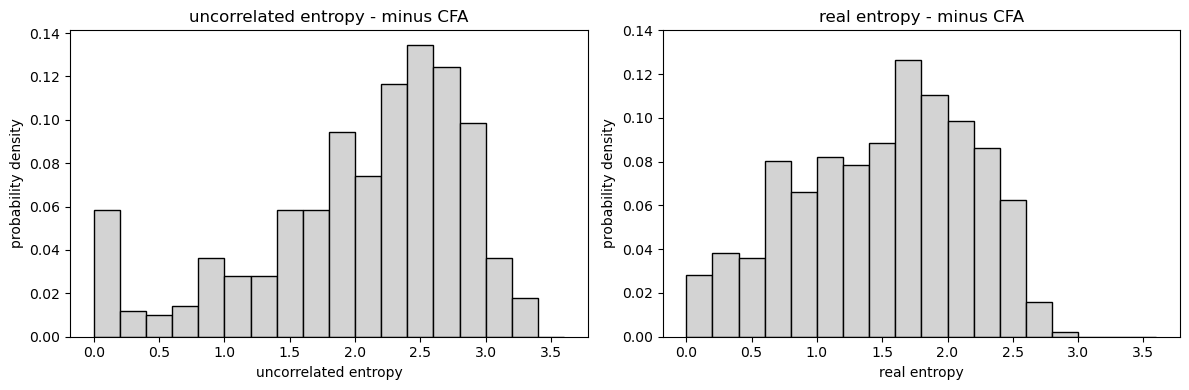

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate and normalize values for uncorrelated entropy
values_uncor, bins = np.histogram(
    data_done["uncorrelated_entropy"], bins=np.linspace(0, 3.6, 19)
)
values_uncor = values_uncor / sum(values_uncor)

# Calculate and normalize values for real entropy
values_real, bins = np.histogram(
    data_done["minus_cfa real entropy"], bins= bins)

values_real = values_real / sum(values_real)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].bar(
    bins[:-1],
    values_uncor,
    align="edge",
    width=bins[1] - bins[0],
    color="lightgrey",
    edgecolor="black",
)
axes[0].set_title("uncorrelated entropy - minus CFA")
axes[0].set_ylabel("probability density")
axes[0].set_xlabel("uncorrelated entropy")

axes[1].bar(
    bins[:-1],
    values_real,
    align="edge",
    width=bins[1] - bins[0],
    color="lightgrey",
    edgecolor="black",
)
axes[1].set_title("real entropy - minus CFA")
axes[1].set_ylabel("probability density")
axes[1].set_xlabel("real entropy")
axes[1].set_ylim(0, 0.14)

plt.tight_layout()
plt.show()

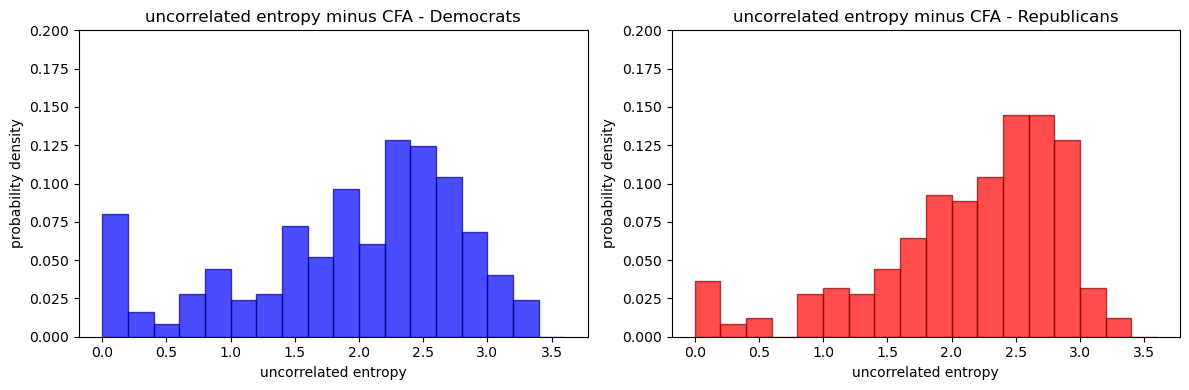

In [7]:
df1 = data_done[data_done["party"] == "Democrat"]
df2 = data_done[data_done["party"] == "Republican"]

values_uncor_d, bins = np.histogram(
    df1["uncorrelated_entropy"], bins=np.linspace(0, 3.6, 19)
)
values_uncor_d = values_uncor_d / sum(values_uncor_d)

# Calculate and normalize values for real entropy
values_uncor_r, bins = np.histogram(
    df2["uncorrelated_entropy"], bins=bins)

values_uncor_r = values_uncor_r / sum(values_uncor_r)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].bar(
    bins[:-1],
    values_uncor_d,
    align="edge",
    width=bins[1] - bins[0],
    alpha=0.7,
    color="blue",
    edgecolor="darkblue",
)
axes[0].set_title("uncorrelated entropy minus CFA - Democrats")
axes[0].set_ylabel("probability density")
axes[0].set_xlabel("uncorrelated entropy")

axes[1].bar(
    bins[:-1],
    values_uncor_r,
    align="edge",
    width=bins[1] - bins[0],
    alpha=0.7,
    color="red",
    edgecolor="darkred",
)
axes[1].set_title("uncorrelated entropy minus CFA - Republicans")
axes[1].set_ylabel("probability density")
axes[1].set_xlabel("uncorrelated entropy")
axes[0].set_ylim(0, 0.20)
axes[1].set_ylim(0, 0.20)

plt.tight_layout()
plt.show()

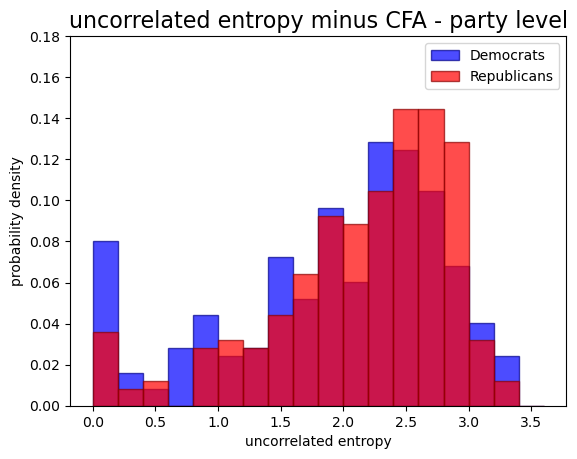

In [10]:
plt.bar(
    bins[:-1],
    values_uncor_d,
    align="edge",
    width=bins[1] - bins[0],
    label="Democrats",
    alpha=0.7,
    color="blue",
    edgecolor="darkblue",
)

plt.bar(
    bins[:-1],
    values_uncor_r,
    align="edge",
    width=bins[1] - bins[0],
    label="Republicans",
    color="red",
    alpha=0.7,
    edgecolor="darkred",
)

plt.title("uncorrelated entropy minus CFA - party level", fontsize=16)
plt.legend()
plt.ylabel("probability density")
plt.xlabel("uncorrelated entropy")
plt.ylim(0, 0.18)
plt.show()

## correlated plots

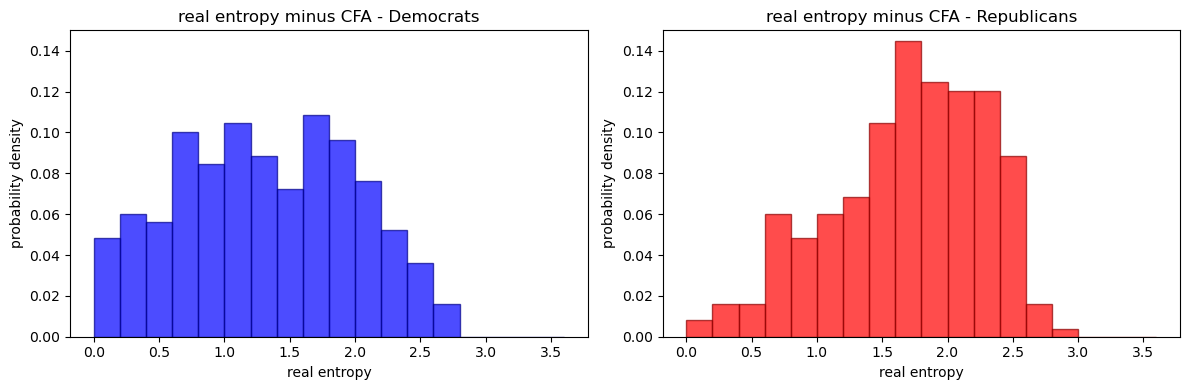

In [11]:
values_real_d, bins = np.histogram(
    df1["minus_cfa real entropy"], bins=np.linspace(0, 3.6, 19)
)
values_real_d = values_real_d / sum(values_real_d)

values_real_r, bins = np.histogram(df2["minus_cfa real entropy"], bins=bins)
values_real_r = values_real_r / sum(values_real_r)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].bar(
    bins[:-1],
    values_real_d,
    align="edge",
    width=bins[1] - bins[0],
    alpha=0.7,
    color="blue",
    edgecolor="darkblue",
)
axes[0].set_title("real entropy minus CFA - Democrats")
axes[0].set_ylabel("probability density")
axes[0].set_xlabel("real entropy")

axes[1].bar(
    bins[:-1],
    values_real_r,
    align="edge",
    width=bins[1] - bins[0],
    alpha=0.7,
    color="red",
    edgecolor="darkred",
)

axes[1].set_title("real entropy minus CFA - Republicans")
axes[1].set_ylabel("probability density")
axes[1].set_xlabel("real entropy")
axes[0].set_ylim(0, 0.15)
axes[1].set_ylim(0, 0.15)

plt.tight_layout()
plt.show()

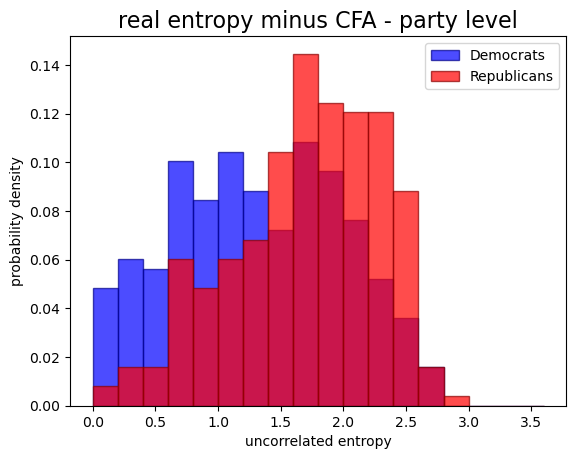

In [12]:
plt.bar(
    bins[:-1],
    values_real_d,
    align="edge",
    width=bins[1] - bins[0],
    label="Democrats",
    alpha=0.7,
    color="blue",
    edgecolor="darkblue",
)

plt.bar(
    bins[:-1],
    values_real_r,
    align="edge",
    width=bins[1] - bins[0],
    label="Republicans",
    alpha=0.7,
    color="red",
    edgecolor="darkred",
)

plt.title("real entropy minus CFA - party level", fontsize=16)
plt.legend()
plt.ylabel("probability density")
plt.xlabel("uncorrelated entropy")
plt.show()

In [78]:
data_done.to_csv("minus_cfa_plus_entropy.csv")

## Kolmogorov-Smirnov test

In [ ]:
## https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/

In [2]:
import pandas as pd
from scipy.stats import ks_2samp

In [41]:
ks = pd.read_csv('cola_entropy.csv')

In [44]:
#filter away bernie + alex for stats sake
id = [124955570892789, 1316372698453411]
ks = ks[~ks["page_id"].isin(id)]

In [91]:
ks_d = ks[ks["party"] == "Democrat"]
ks_r = ks[ks["party"] == "Republican"]

In [46]:
## Kolmogorov-Smirnow test uncor entropy
sample_d_uncor = ks_d["uncor entropy"]
sample_r_uncor = ks_r["uncor entropy"]

ks_statistic, p_value = ks_2samp(sample_d_uncor, sample_r_uncor)

print(f"Comparing uncorrelated entropy across the two parties")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy across the two parties
Kolmogorov–Smirnov Statistic: 0.1597709613910639
P-value: 0.0023502998096288875
Reject the null hypothesis. The two samples come from different distributions.


In [48]:
## Kolmogorov-Smirnow test real entropy
sample_d_real = ks_d["real entropy"]
sample_r_real = ks_r["real entropy"]
ks_statistic, p_value = ks_2samp(sample_d_real, sample_r_real)

print(f"Comparing real entropy across the two parties")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy across the two parties
Kolmogorov–Smirnov Statistic: 0.2512812035047115
P-value: 1.163138154378667e-07
Reject the null hypothesis. The two samples come from different distributions.


In [86]:
## Kolmogorov-Smirnow uncor entropy >=2

# filtering away Steven Cohen from dataset, because he has no rows after setting th and has a nan value
id = [6358769182]
ks_d = ks_d[~ks_d["page_id"].isin(id)]

sample1 = ks_d["real entropy >=2"]
sample2 = ks_r["real entropy >=2"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=2")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=2
Kolmogorov–Smirnov Statistic: 0.24104637480010863
P-value: 4.549145298767737e-07
Reject the null hypothesis. The two samples come from different distributions.


In [87]:
## Kolmogorov-Smirnow real entropy >=2

sample1 = ks_d["uncor entropy >=2"]
sample2 = ks_r["uncor entropy >=2"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=2")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=2
Kolmogorov–Smirnov Statistic: 0.15846483420330085
P-value: 0.0026475372761390597
Reject the null hypothesis. The two samples come from different distributions.


In [88]:
## Kolmogorov-Smirnow uncor entropy >=4

# filtering away Shelby Labs from dataset, because he has no rows after setting th and has a nan value
id = [108358104117725]
ks_r = ks_r[~ks_r["page_id"].isin(id)]

sample1 = ks_d["uncor entropy >=4"]
sample2 = ks_r["uncor entropy >=4"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncor entropy >=4")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncor entropy >=4
Kolmogorov–Smirnov Statistic: 0.16566703017084697
P-value: 0.0014573374611393107
Reject the null hypothesis. The two samples come from different distributions.


In [90]:
## Kolmogorov-Smirnow real entropy >=4

sample1 = ks_d["real_entropy >=4"]
sample2 = ks_r["real_entropy >=4"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing real entropy >=4")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy >=4
Kolmogorov–Smirnov Statistic: 0.2324912153156428
P-value: 1.3592746595000357e-06
Reject the null hypothesis. The two samples come from different distributions.


## sammenligner med minus CFA

In [95]:
df1 = data_done[data_done["party"] == "Democrat"]
df2 = data_done[data_done["party"] == "Republican"]

In [101]:
sample1 = ks_d["uncor entropy"]
sample2 = df1["uncorrelated_entropy"] # where there is no
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncorrelated entropy for DEMOCRATS with original dataset vs minus call for action")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy for DEMOCRATS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.316551376609098
P-value: 7.408934218078916e-12
Reject the null hypothesis. The two samples come from different distributions.


In [102]:
sample1 = ks_r["uncor entropy"]
sample2 = df2["uncorrelated_entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(f"Comparing uncorrelated entropy for REPUBLICANS with original dataset vs minus call for action")
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing uncorrelated entropy for REPUBLICANS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.33669857294791816
P-value: 3.817094528289899e-13
Reject the null hypothesis. The two samples come from different distributions.


In [103]:
sample1 = ks_d["real entropy"]
sample2 = df1["minus_cfa real entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(
    f"Comparing real entropy for DEMOCRATS with original dataset vs minus call for action"
)
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy for DEMOCRATS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.21236275902087437
P-value: 1.5040526371612142e-05
Reject the null hypothesis. The two samples come from different distributions.


In [104]:
sample1 = ks_r["real entropy"]
sample2 = df2["minus_cfa real entropy"]
ks_statistic, p_value = ks_2samp(sample1, sample2)

print(
    f"Comparing real entropy for REPUBLICANS with original dataset vs minus call for action"
)
print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis. The two samples come from different distributions."
    )
else:
    print(
        "Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions."
    )

Comparing real entropy for REPUBLICANS with original dataset vs minus call for action
Kolmogorov–Smirnov Statistic: 0.27574328936298553
P-value: 6.285264524526123e-09
Reject the null hypothesis. The two samples come from different distributions.
